In [1]:
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from langchain_core.messages import AIMessage, BaseMessage, HumanMessage
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_anthropic import ChatAnthropic

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "あなたは、新規プロダクトを作成するプロダクトマネージャーです。"
            "ユーザから与えられたお題を元に300字程度のビジネスアイディアを作成してください。"
            "投資家から批評があった場合は、投資家の意見を参考にビジネスアイディアをアップデートしてください。"
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)
llm = ChatAnthropic(temperature=0, model_name="claude-3-5-haiku-20241022", verbose=True)

generate = prompt | llm

In [3]:
product_plan = ""
request = HumanMessage(
    content="医療業界向けLLMアプリケーション"
)
for chunk in generate.stream({"messages": [request]}):
    print(chunk.content, end="")
    product_plan += chunk.content

ビジネスアイディア：「MedAI Assist」

医療専門家向けの高度な自然言語処理AIプラットフォームを開発します。電子カルテの自動要約、診断支援、治療計画の最適化を主な機能とし、医師の業務効率を大幅に改善します。HIPAA準拠のセキュリティを備え、患者データの機密性を厳格に保護。AIが医学文献を継続的に学習し、最新の医学知識を即座に反映できるシステムを構築します。初期ターゲットは中規模病院と大学病院とし、月額サブスクリプションモデルを採用。医療従事者の負担軽減と診断精度向上に貢献し、医療DXを加速させるソリューションを提供します。

特徴：
- 高精度な医療言語モデル
- リアルタイム診断支援
- セキュアなデータ管理
- 継続的な知識アップデート

In [4]:
reflection_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "あなたはプロの投資家です。"
            "与えられたビジネスアイティアに対して批評と改善案を提示します。"
            "新規性や収益性やリスクなどの情報を含む詳細な改善案を提示してください。",
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)
reflect = reflection_prompt | llm

In [5]:
reflection = ""
for chunk in reflect.stream({"messages": [request, HumanMessage(content=product_plan)]}):
    print(chunk.content, end="")
    reflection += chunk.content

ビジネスアイディア「MedAI Assist」の分析と改善案：

【新規性の評価】
非常に高い潜在価値を持つアイディアと評価します。医療AI市場の成長トレンドと完全に一致しており、差別化要素も明確です。

【強み】
1. 明確な市場ニーズ
2. HIPAA準拠による信頼性
3. 継続的な学習モデル
4. 具体的な業務改善ポイント

【改善提案】

1.収益モデルの多様化
- 従量制課金オプション追加
- エンタープライズ向けカスタマイズプラン
- データ分析サービスの横展開

2.リスク軽減戦略
- 医療倫理委員会との連携
- 複数の医療専門家による継続的な検証
- AIの判断根拠の透明性確保

3.技術的拡張
- マルチ言語対応
- 画像診断AIとの統合
- リアルタイム多言語翻訳機能

4.市場展開戦略
- 初期は米国の中規模病院から
- 段階的に国際展開
- 学術機関との共同研究

【想定リスク】
- 法的規制対応
- データプライバシー
- AIの診断精度担保

【推定初期投資】
5-10百万ドル

【年間売上予測】
導入3年後：15-25百万ドル

総合評価：非常に有望なビジネスモデル

In [6]:
for chunk in generate.stream(
    {"messages": [request, AIMessage(content=product_plan), HumanMessage(content=reflection)]}
):
    print(chunk.content, end="")

投資家の詳細な分析と改善提案を踏まえ、ビジネスアイディア「MedAI Assist」を以下のようにアップデートします：

改訂版ビジネスアイディア：「MedAI Assist Pro」

前回のコンセプトに、投資家の提案を統合し、より包括的で競争力のあるソリューションを目指します。

主な強化ポイント：

1. 収益モデルの多様化
- 従量制課金オプションを追加
- エンタープライズ向けカスタマイズプラン導入
- 匿名化データを活用した研究支援サービス

2. リスク管理戦略
- 医療倫理委員会との継続的な協議体制
- 複数の医療専門家による定期的な検証プログラム
- AIの判断根拠を可視化する透明性機能

3. 技術的拡張
- 英語、スペイン語、中国語対応
- 放射線画像診断AIとのシームレスな統合
- リアルタイム多言語医療用語翻訳機能

4. 市場展開アプローチ
- 米国の中規模病院から段階的に展開
- 北米、欧州の主要医療研究機関との連携
- 学術機関との共同研究プログラム

追加の差別化要素：
- 継続的な機械学習による診断精度向上
- サイバーセキュリティの多層防御
- パーソナライズド医療支援機能

初期ターゲット：
- 中規模病院（100-500床）
- 大学病院の研究部門
- 専門クリニックグループ

このアップデートにより、「MedAI Assist Pro」は単なるAIツールから、包括的な医療支援プラットフォームへと進化します。投資家の指摘を反映し、技術的・戦略的な深みを増すことで、市場での競争力を大幅に高めました。

In [7]:
from typing import Annotated, List, Sequence
from langgraph.graph import END, StateGraph, START
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import MemorySaver
from typing_extensions import TypedDict

finalization_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "あなたは資料作成のプロです。"
            "受け取ったビジネスアイディアを元にMarp形式でピッチ資料を作成してください",
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)
finalization = finalization_prompt | llm


class State(TypedDict):
    messages: Annotated[list, add_messages]


async def generation_node(state: State) -> State:
    return {"messages": [await generate.ainvoke(state["messages"])]}


async def reflection_node(state: State) -> State:
    # Other messages we need to adjust
    cls_map = {"ai": HumanMessage, "human": AIMessage}
    # First message is the original user request. We hold it the same for all nodes
    translated = [state["messages"][0]] + [
        cls_map[msg.type](content=msg.content) for msg in state["messages"][1:]
    ]
    res = await reflect.ainvoke(translated)
    # We treat the output of this as human feedback for the generator
    return {"messages": [HumanMessage(content=res.content)]}


async def finalization_node(state: State) -> State:
    return {"messages": [await finalization.ainvoke({"messages": state["messages"][:-1]})]}


builder = StateGraph(State)
builder.add_node("generate", generation_node)
builder.add_node("reflect", reflection_node)
builder.add_node("finalize", finalization_node)
builder.add_edge(START, "generate")
builder.add_edge("finalize", END)


def should_continue(state: State):
    if len(state["messages"]) > 4:
        # End after 2 iterations
        return "finalize"
    return "reflect"



builder.add_conditional_edges("generate", should_continue)
builder.add_edge("reflect", "generate")
memory = MemorySaver()
graph = builder.compile(checkpointer=memory)

/Users/ken/.pyenv/versions/3.11.5/lib/python3.11/site-packages/langgraph/graph/graph.py:36: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  from langgraph.pregel import Channel, Pregel


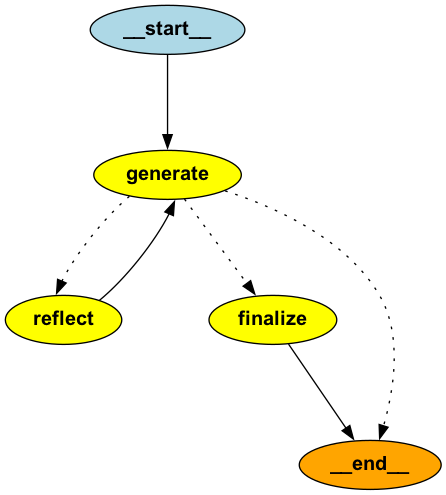

In [8]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_png()))

In [9]:
config = {"configurable": {"thread_id": "1"}}

In [10]:
async for event in graph.astream(
    {
        "messages": [
            HumanMessage(
                content="医療系LLMアプリケーション"
            )
        ],
    },
    config,
):
    print(event)
    print("---")

{'generate': {'messages': [AIMessage(content='ビジネスアイディア：「MediAI - パーソナライズド医療サポートプラットフォーム」\n\n医療分野における情報格差と個別化医療の課題を解決するAIアプリケーションです。患者と医療専門家をつなぐ革新的なプラットフォームとして、以下の特徴を持ちます：\n\n1. 症状入力による高精度な予備診断\n2. 個人の医療履歴に基づくカスタマイズされた健康アドバイス\n3. 医療専門家とのオンライン相談機能\n4. 最新の医学研究データベースとのリアルタイム連携\n\nプライバシー保護と高度な暗号化技術により、安全かつ信頼性の高いサービスを提供。医療機関との連携を通じて、予防医療と早期発見に貢献します。\n\n対象ユーザーは、健康に不安を感じる20〜60代の個人で、スマートフォンを通じて簡単に利用できます。', additional_kwargs={}, response_metadata={'id': 'msg_01At2wenJHTT4F74aKp75jMc', 'model': 'claude-3-5-haiku-20241022', 'stop_reason': 'end_turn', 'stop_sequence': None, 'usage': {'input_tokens': 120, 'output_tokens': 316}}, id='run-f0982cc6-3f31-444e-8c64-0562d5a214cf-0', usage_metadata={'input_tokens': 120, 'output_tokens': 316, 'total_tokens': 436, 'input_token_details': {}})]}}
---
{'reflect': {'messages': [HumanMessage(content='MediAIビジネスアイディアの詳細な分析と改善提案:\n\n【新規性の評価】\n強み:\n- AIを活用した個別化医療サポート\n- 包括的な医療情報プラットフォーム\n- プライバシー保護技術の実装\n\n【収益性分析】\n想定収益モデル:\n1. サブスクリプション制\n2. 医療機関との提携料\n3. データ匿名化によ

In [11]:
state = graph.get_state(config)

In [12]:
ChatPromptTemplate.from_messages(state.values["messages"]).pretty_print()

================================ Human Message =================================

医療系LLMアプリケーション

================================== Ai Message ==================================

ビジネスアイディア：「MediAI - パーソナライズド医療サポートプラットフォーム」

医療分野における情報格差と個別化医療の課題を解決するAIアプリケーションです。患者と医療専門家をつなぐ革新的なプラットフォームとして、以下の特徴を持ちます：

1. 症状入力による高精度な予備診断
2. 個人の医療履歴に基づくカスタマイズされた健康アドバイス
3. 医療専門家とのオンライン相談機能
4. 最新の医学研究データベースとのリアルタイム連携

プライバシー保護と高度な暗号化技術により、安全かつ信頼性の高いサービスを提供。医療機関との連携を通じて、予防医療と早期発見に貢献します。

対象ユーザーは、健康に不安を感じる20〜60代の個人で、スマートフォンを通じて簡単に利用できます。

================================ Human Message =================================

MediAIビジネスアイディアの詳細な分析と改善提案:

【新規性の評価】
強み:
- AIを活用した個別化医療サポート
- 包括的な医療情報プラットフォーム
- プライバシー保護技術の実装

【収益性分析】
想定収益モデル:
1. サブスクリプション制
2. 医療機関との提携料
3. データ匿名化による研究機関への情報提供

【市場性】
- グローバル遠隔医療市場の成長
- デジタルヘルスケアへの需要増加

【改善提案】

1. リスク軽減戦略
- 法的免責事項の明確化
- 医療専門家による継続的な監修
- 誤診リスクの法的対応

2. 収益拡大施策
- 企業向け健康管理サービス
- 保険会社との連携
- 国際展開

3. 技術的改善
- マルチ言語対応
- より高度な機械学習モデル
- ウェアラブルデバイスとの統合

4. 差別化ポイント
- AIと人間の専門家の最適なハイ

In [13]:
print(state.values["messages"][1].content)

ビジネスアイディア：「MediAI - パーソナライズド医療サポートプラットフォーム」

医療分野における情報格差と個別化医療の課題を解決するAIアプリケーションです。患者と医療専門家をつなぐ革新的なプラットフォームとして、以下の特徴を持ちます：

1. 症状入力による高精度な予備診断
2. 個人の医療履歴に基づくカスタマイズされた健康アドバイス
3. 医療専門家とのオンライン相談機能
4. 最新の医学研究データベースとのリアルタイム連携

プライバシー保護と高度な暗号化技術により、安全かつ信頼性の高いサービスを提供。医療機関との連携を通じて、予防医療と早期発見に貢献します。

対象ユーザーは、健康に不安を感じる20〜60代の個人で、スマートフォンを通じて簡単に利用できます。


In [14]:
print(state.values["messages"][-2].content)

投資家の詳細な評価を踏まえ、MediAIのビジネスモデルをさらに洗練させます：

【MediAI 2.0 - インテリジェント医療エコシステムの進化】

1. 戦略的フォーカス強化
- AIとヒューマンエキスパートの高度な統合
- 継続的な学習モデルの実装
- エビデンスベースの医療情報提供

2. 収益モデルの精緻化
新サブスクリプションレベル：
- ベーシック（無料）
- プロ（個人向け詳細分析）
- エンタープライズ（法人・保険会社向け）
- アカデミック（研究機関向け特別プラン）

収益多様化戦略：
- データ匿名化による研究機関への情報提供
- API提供による外部サービス連携
- 予防医療コンサルティングサービス

3. 技術イノベーション
- 量子機械学習の導入
- ブロックチェーンによるデータ信頼性確保
- エッジコンピューティング技術の活用
- リアルタイム多言語対応AI

4. リスク管理の高度化
- 国際医療規制への完全準拠
- 第三者による継続的な監査
- 高度な暗号化とプライバシー保護
- 法的リスク軽減チームの設置

5. グローバル展開戦略
初期ターゲット市場：
- 北米（アメリカ、カナダ）
- 欧州（イギリス、ドイツ、フランス）
- アジア太平洋（日本、シンガポール、オーストラリア）

6. パートナーシップ戦略
- 大学医学部との共同研究
- 主要医療機器メーカーとの技術提携
- グローバル保険会社との戦略的連携

7. 社会的インパクト
- 医療アクセス改善
- 予防医療の推進
- 医療コスト削減への貢献

【投資家向け追加価値】

財務プロジェクション：
- 初年度売上：300万ドル
- 3年後売上：2000万ドル
- 5年後売上：5000万ドル

想定ROI：
- 3年以内：25-35%
- 5年以内：60-80%

【差別化ポイント】
- 高度にパーソナライズされた医療サポート
- AIと人間専門家の最適な協働
- 継続的な技術イノベーション
- 厳格なデータ信頼性

このアップデートにより、MediAIはより洗練され、投資家にとってさらに魅力的なビジネスモデルへと進化しました。技術、市場性、収益性のバランスを保ちながら、持続可能な成長を目指します。


In [15]:
print(state.values["messages"][-1].content)

詳細な評価結果を踏まえ、Marp形式でピッチ資料を作成します：

---
# MediAI: インテリジェント医療エコシステム
## 革新的なAI医療プラットフォーム

![bg right:40% fit](https://example.com/mediai_logo.png)

---
## 市場機会と成長性

- **グローバル医療デジタル市場**
  - 年間成長率: 25-30%
  - 2025年市場規模: 5000億ドル

- **ターゲットセグメント**
  - デジタルヘルスケア
  - 遠隔医療
  - パーソナライズド医療

---
## 独自の技術的優位性

1. **ハイブリッドAIモデル**
   - AIと人間専門家の最適な連携
   - リアルタイムデータ更新

2. **高度な技術特徴**
   - マルチ言語対応
   - ウェアラブルデバイス統合
   - 先進的機械学習アルゴリズム

---
## 収益モデル

### 多層的サブスクリプション戦略

| レベル | 特徴 | 価格帯 | ターゲット |
|--------|------|--------|------------|
| ベーシック | 基本機能 | 無料/月5ドル | 一般ユーザー |
| プレミアム | 詳細分析 | 月20ドル | 健康意識高い層 |
| エンタープライズ | 法人向けソリューション | 月500ドル〜 | 企業・保険会社 |

---
## 投資対効果

### 成長予測

- **初期投資**: 300万ドル (シード)
- **予想売上**
  - 初年度: 500万ドル
  - 3年後: 2000万ドル

### ROI予測
- 3年以内: 20-30%
- 5年以内: 50-70%

---
## リスク管理戦略

1. 法的コンプライアンス
2. データセキュリティ強化
3. 国際的医療規制対応
4. 継続的な技術革新
5. 専門家による継続監修

---
## 成長ロードマップ

1. **フェーズ1**: 北米市場展開
2. **フェーズ2**: 欧州市場進出
3. **フェーズ3**: アジア太平洋地域拡大
4. **フェーズ4**: グローバル展開

---
## 投資家へのメッセージ

### 未来の医療を変革する機